In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import logging

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_style({"font.family": "serif", "font.serif": "Times New Roman"})
Path("plots").mkdir(parents=True, exist_ok=True)

In [12]:
results = pd.read_csv("../output/train.csv")
input_size = (
    results["data.generate.kwargs.n_samples"]
    * results["data.generate.kwargs.n_features"]
)
results["Kernel"] = results["model.init.kernel"].copy()
results["Features"] = results["data.generate.kwargs.n_features"].copy()
results["Samples"] = results["data.sample.train_size"].copy()
results["input_size"] = input_size
if "Unnamed: 0" in results.columns:
    del results["Unnamed: 0"]
for col in results.columns:
    if col == "data.name" and isinstance(results[col][0], list):
        results[col] = results[col].apply(lambda x: x[0])
results = results[results["model.init.kwargs.kernel"] != "sigmoid"]

KeyError: 'data.generate.kwargs.n_samples'

In [11]:
attack_results = pd.read_csv("../output/attack.csv")
attack_results["Kernel"] = attack_results["model.init.kwargs.kernel"].copy()
attack_results["Features"] = attack_results["data.generate.kwargs.n_features"].copy()
attack_results["Samples"] = attack_results["data.sample.train_size"].copy()
if "Unnamed: 0" in attack_results.columns:
    del attack_results["Unnamed: 0"]
for col in attack_results.columns:
    if col == "data.name" and isinstance(attack_results[col][0], list):
        attack_results[col] = attack_results[col].apply(lambda x: x[0])

KeyError: 'model.init.kernel'

In [10]:
results['model.init.kwargs.kernel']


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
382    NaN
383    NaN
384    NaN
385    NaN
386    NaN
Name: model.init.kwargs.kernel, Length: 387, dtype: object

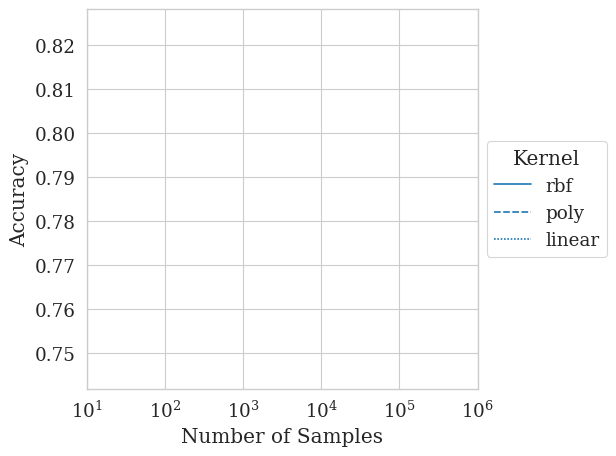

In [7]:
graph1 = sns.lineplot(
    x="data.sample.train_size",
    y="accuracy",
    data=results,
    style="Kernel",
    style_order=["rbf", "poly", "linear"],
)
graph1.legend(labels=["Linear", "RBF", "Poly"])
graph1.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
graph1.set_xlabel("Number of Samples")
graph1.set_ylabel("Accuracy")
graph1.set_xscale("log")
graph1.get_figure().tight_layout()
graph1.set(xlim=(10, 1e6))
graph1.get_figure().savefig("plots/accuracy_vs_samples.pdf")

In [ ]:
graph2 = sns.lineplot(
    x="data.generate.kwargs.n_features",
    y="accuracy",
    data=results,
    style="Kernel",
    style_order=["rbf", "poly", "linear"],
)
graph2.set_xlabel("Number of Features")
graph2.set_ylabel("Accuracy")
graph2.set_xscale("log")
graph2.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
graph2.get_figure().tight_layout()
graph2.get_figure().savefig("plots/accuracy_vs_features.pdf")


In [ ]:
graph3 = sns.lineplot(
    x="data.generate.kwargs.n_features",
    y="train_time",
    data=results,
    style="Kernel",
    style_order=["rbf", "poly", "linear"],
)
graph3.set_xlabel("Number of Features")
graph3.set_ylabel("Training Time")
graph3.set(yscale="log", xscale="log")
graph3.legend(title="Kernel")
graph3.get_figure().tight_layout()
graph3.get_figure().savefig("plots/train_time_vs_features.pdf")
plt.gcf().clear()


In [ ]:
graph4 = sns.lineplot(
    x="data.sample.train_size",
    y="train_time",
    data=results,
    style="Kernel",
    style_order=["rbf", "poly", "linear"],
)
graph4.set_xlabel("Number of Samples")
graph4.set_ylabel("Training Time")
graph4.set(yscale="log", xscale="log", xlim=(10, 1e6))
graph4.legend(title="Kernel")
graph4.get_figure().tight_layout()
graph4.get_figure().savefig("plots/train_time_vs_samples.pdf")
plt.gcf().clear()

In [ ]:
fig, ax = plt.subplots(2, 2)
graph5 = sns.lineplot(
    x="attack.init.eps",
    y="accuracy",
    data=attack_results,
    style="Kernel",
    ax=ax[0, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph5.set(xscale="log", xlabel="Perturbation Distance", ylabel="Accuracy")
graph6 = sns.lineplot(
    x="attack.init.eps_step",
    y="accuracy",
    data=attack_results,
    style="Kernel",
    ax=ax[0, 1],
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)

In [ ]:









graph6.set(xscale="log", xlabel="Perturbation Step", ylabel="Accuracy")
graph7 = sns.lineplot(
    x="attack.init.max_iter",
    y="accuracy",
    data=attack_results,
    style="Kernel",
    ax=ax[1, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph7.set(xscale="log", xlabel="Maximum Iterations", ylabel="Accuracy")
graph8 = sns.lineplot(
    x="attack.init.batch_size",
    y="accuracy",
    data=attack_results,
    style="Kernel",
    ax=ax[1, 1],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph8.set(xscale="log", xlabel="Batch Size", ylabel="Accuracy")
graph6.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
fig.tight_layout()
fig.savefig("plots/accuracy_vs_attack_parameters.pdf")
plt.gcf().clear()

fig, ax = plt.subplots(2, 2)
graph9 = sns.lineplot(
    x="attack.init.eps",
    y="adv_fit_time",
    data=attack_results,
    style="Kernel",
    ax=ax[0, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph9.set(xscale="log", xlabel="Perturbation Distance", ylabel="Attack Time")
graph10 = sns.lineplot(
    x="attack.init.eps_step",
    y="adv_fit_time",
    data=attack_results,
    style="Kernel",
    ax=ax[0, 1],
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph10.set(xscale="log", xlabel="Perturbation Step", ylabel="Attack Time")
graph11 = sns.lineplot(
    x="attack.init.max_iter",
    y="adv_fit_time",
    data=attack_results,
    style="Kernel",
    ax=ax[1, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph11.set(xscale="log", xlabel="Maximum Iterations", ylabel="Attack Time")
graph12 = sns.lineplot(
    x="attack.init.batch_size",
    y="adv_fit_time",
    data=attack_results,
    style="Kernel",
    ax=ax[1, 1],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph12.set(xscale="log", xlabel="Batch Size", ylabel="Attack Time")
graph10.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
fig.tight_layout(h_pad=0.5)
fig.savefig("plots/train_time_vs_attack_parameters.pdf")
plt.gcf().clear()

retrain_df = pd.DataFrame()
for kernel in ["rbf", "linear", "poly"]:
    try:
        tmp = pd.read_csv(f"retrain/{kernel}/results.csv")
    except FileNotFoundError:
        break
    tmp["Kernel"] = kernel
    tmp["Epochs"] = tmp.index
    retrain_df = pd.concat([retrain_df, tmp], axis=0)
    retrain_df = retrain_df.reset_index(drop=True)
    if "Unnamed: 0" in retrain_df.columns:
        del retrain_df["Unnamed: 0"]


retrain = sns.lineplot(
    x="Epochs",
    y="ben_score",
    data=retrain_df,
    style="Kernel",
    style_order=["rbf", "poly", "linear"],
)
retrain = sns.lineplot(
    x="Epochs",
    y="adv_score",
    data=retrain_df,
    style="Kernel",
    color="darkred",
    legend=False,
    style_order=["rbf", "poly", "linear"],
)
retrain.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
retrain.set_xlabel("Retraining Epochs")
retrain.set_ylabel("Accuracy")
retrain.get_figure().tight_layout()
retrain.get_figure().savefig("plots/retrain_accuracy.pdf")
plt.gcf().clear()

retrain_df["ben_time"] = retrain_df["ben_time"] * retrain_df["train_size"] * 10
retrain_df["adv_time"] = retrain_df["adv_time"] * retrain_df["attack_size"]
retrain = sns.lineplot(
    x="Epochs",
    y="ben_time",
    data=retrain_df,
    style="Kernel",
    style_order=["rbf", "poly", "linear"],
)
retrain = sns.lineplot(
    x="Epochs",
    y="adv_time",
    data=retrain_df,
    style="Kernel",
    color="darkred",
    legend=False,
    style_order=["rbf", "poly", "linear"],
)
retrain.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
retrain.set_xlabel("Retraining Epochs")
retrain.set_ylabel("Time")
retrain.set_yscale("log")
retrain.get_figure().tight_layout()
retrain.get_figure().savefig("plots/retrain_time.pdf")
plt.gcf().clear()

confidence_df = pd.read_csv("plots/before_retrain_confidence.csv")
fig, ax = plt.subplots(2, 2)
graph9 = sns.lineplot(
    x="eps",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[0, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph9.set(xscale="log", xlabel="Perturbation Distance", ylabel="False Confidence")
graph10 = sns.lineplot(
    x="eps_step",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[0, 1],
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph10.set(xscale="log", xlabel="Perturbation Step", ylabel="False Confidence")
graph11 = sns.lineplot(
    x="max_iter",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[1, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph11.set(xscale="log", xlabel="Maximum Iterations", ylabel="False Confidence")
graph12 = sns.lineplot(
    x="batch_size",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[1, 1],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph12.set(xscale="log", xlabel="Batch Size", ylabel="False Confidence")
graph10.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
fig.tight_layout(h_pad=0.5)
fig.savefig("plots/confidence_vs_attack_parameters.pdf")
plt.gcf().clear()

confdence_df = pd.read_csv("plots/after_retrain_confidence.csv")
confidence_df.columns
fig, ax = plt.subplots(2, 2)
graph9 = sns.lineplot(
    x="eps",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[0, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph9.set(xscale="log", xlabel="Perturbation Distance", ylabel="False Confidence")
graph10 = sns.lineplot(
    x="eps_step",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[0, 1],
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph10.set(xscale="log", xlabel="Perturbation Step", ylabel="False Confidence")
graph11 = sns.lineplot(
    x="max_iter",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[1, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph11.set(xscale="log", xlabel="Maximum Iterations", ylabel="False Confidence")
graph12 = sns.lineplot(
    x="batch_size",
    y="Average False Confidence",
    data=confidence_df,
    style="Kernel",
    ax=ax[1, 1],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph12.set(xscale="log", xlabel="Batch Size", ylabel="False Confidence")
graph10.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
fig.tight_layout(h_pad=0.5)
fig.savefig("plots/retrain_confidence_vs_attack_parameters.pdf")
plt.gcf().clear()